#                                    Data Augmentation with Keras and TensorFlow










In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Flowers Data_Set

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 10s 0us/step


Pathlib is use to get path

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/6864242336_0d12713fe5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3637428148_a1dcccafa9_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/17249393016_093e915012_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4697206799_19dd2a3193_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2713919471_301fcc941f.jpg'),
 PosixPath('datasets/flower_photos/daisy/4897587985_f9293ea1ed.jpg'),
 PosixPath('datasets/flower_photos/daisy/3285641623_da0e47f49a.jpg'),
 PosixPath('datasets/flower_photos/daisy/5883162120_dc7274af76_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg'),
 PosixPath('datasets/flower_photos/daisy/1656856503_447e5b0f03.jpg'),
 PosixPath('datasets/flower_photos/daisy/18195689904_46619b7e16_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14350958832_29bdd3a254.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110105726_53eb7a93be_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/17357636476_1953c07aa4_n.jpg'),

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [ ]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
  

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 17s 93ms/step - loss: 2.8681 - accuracy: 0.3681
Epoch 2/10
86/86 [==============================] - 8s 92ms/step - loss: 1.0680 - accuracy: 0.5832
Epoch 3/10
86/86 [==============================] - 8s 93ms/step - loss: 0.7822 - accuracy: 0.7148
Epoch 4/10
86/86 [==============================] - 8s 94ms/step - loss: 0.3369 - accuracy: 0.8928
Epoch 5/10
86/86 [==============================] - 8s 95ms/step - loss: 0.1448 - accuracy: 0.9626
Epoch 6/10
86/86 [==============================] - 8s 96ms/step - loss: 0.0540 - accuracy: 0.9866
Epoch 7/10
86/86 [==============================] - 8s 96ms/step - loss: 0.0371 - accuracy: 0.9920
Epoch 8/10
86/86 [==============================] - 8s 97ms/step - loss: 0.0393 - accuracy: 0.9949
Epoch 9/10
86/86 [==============================] - 8s 96ms/step - loss: 0.0140 - accuracy: 0.9982
Epoch 10/10
86/86 [==============================] - 8s 96ms/step - loss: 0.0131 - accuracy: 0.9985


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 50ms/step - loss: 2.6032 - accuracy: 0.5686


[2.6032183170318604, 0.5686274766921997]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 37ms/step


array([[ -2.03618  ,   4.9913263,   7.442628 , -14.622892 ,  -8.801226 ],
       [  3.1436934,  -4.005374 , -24.924837 , -10.159946 ,   4.308273 ],
       [ -5.4229436,  -9.112774 ,   1.1939094,  -5.2741113,  -6.1486363],
       ...,
       [ -5.7829823,  -3.1156225, -10.324681 ,  -6.3183956, -16.756065 ],
       [  2.506601 ,  -7.576048 ,  -1.4272301, -12.017604 ,  -2.3546462],
       [ -9.2139435, -18.246275 ,  -6.8360786,   2.7314627,  -2.6425881]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.0383889e-05, 7.9337828e-02, 9.2059165e-01, 2.4050989e-10,
       8.1180296e-08], dtype=float32)>

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.expermental.preprocessing.RandomZoom(0.1),
    
])

NameError: ignored

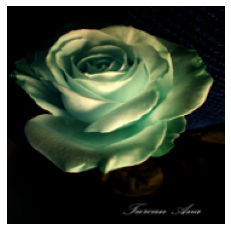

In [ ]:
plt.axis('off')
plt.imshow(X[0])

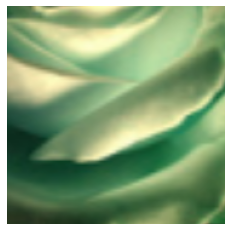

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))